In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Load dataset 
df = pd.read_csv("joined_data_18 columns.csv")

In [3]:
# basic info
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202 entries, 0 to 5201
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   member_number                   2797 non-null   float64
 1   SVC_REQ_DT_x                    5202 non-null   object 
 2   SVC_REQ_ID                      5202 non-null   int64  
 3   SVC_RGN_CD                      5202 non-null   object 
 4   BRKDW_LATD_NUM                  5201 non-null   float64
 5   BRKDW_LNGTD_NUM                 5201 non-null   float64
 6   VEH_MDL_YR_DT                   5182 non-null   object 
 7   CALC_TW_ML_CNT                  5195 non-null   float64
 8   LST_STAT_RSN_TXT                5202 non-null   object 
 9   REQ_SRC_TXT                     5202 non-null   object 
 10  TOT_COST                        5124 non-null   float64
 11  SVC_PRVDR_ID                    5202 non-null   int64  
 12  DIFF_BTW_SERVICE_PROMISED_TIME  52

In [4]:
# the distribution of CONTACT_CENTER values as numbers (counts)
contact_center_distribution = df['CONTACT_CENTER'].value_counts()

# Display the distribution
print(contact_center_distribution)


ERS ONLINE        2494
SMART ACTION      1496
AAA MOBILE APP    1192
#NAME?              20
Name: CONTACT_CENTER, dtype: int64


In [5]:
# Filter out the rows where CONTACT_CENTER is '#NAME?'
df_cleaned = df[df['CONTACT_CENTER'] != '#NAME?']

# Show the distribution again after removing '#NAME?'
contact_center_distribution_cleaned = df_cleaned['CONTACT_CENTER'].value_counts()

# Display the cleaned distribution
print(contact_center_distribution_cleaned)


ERS ONLINE        2494
SMART ACTION      1496
AAA MOBILE APP    1192
Name: CONTACT_CENTER, dtype: int64


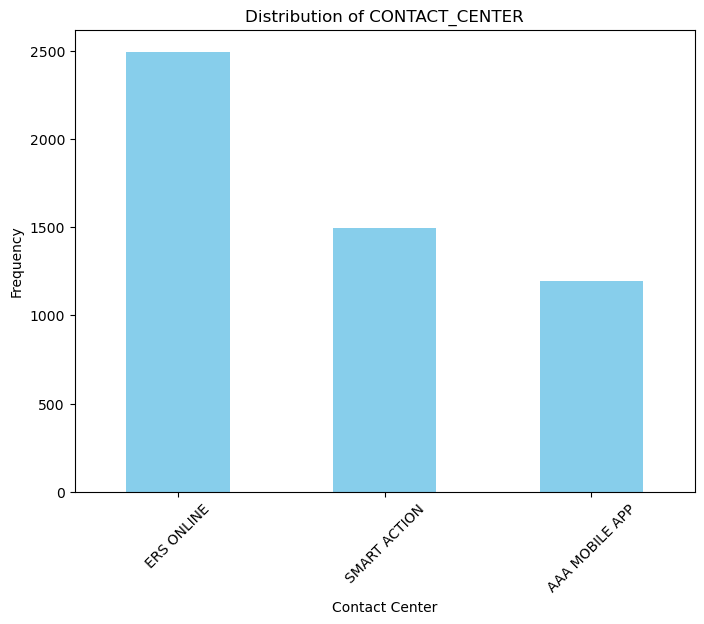

In [6]:
import matplotlib.pyplot as plt

# Bar chart for CONTACT_CENTER distribution
plt.figure(figsize=(8, 6))
df_cleaned['CONTACT_CENTER'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of CONTACT_CENTER')
plt.xlabel('Contact Center')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [7]:
# Define the mapping for contact center labels
contact_center_mapping = {
    0: 'Smart Action',  # Class 0
    1: 'ERS Online',    # Class 1
    2: 'AAA Mobile App' # Class 2
}


In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd



# Encode categorical columns (CONTACT_CENTER, PRI_TRBL_TXT, REQ_SRC_TXT, SVC_RGN_CD, SVC_PRVDR_ID)
label_encoder_contact_center = LabelEncoder()
df_cleaned['CONTACT_CENTER'] = label_encoder_contact_center.fit_transform(df_cleaned['CONTACT_CENTER'])

label_encoder_pri_trbl_txt = LabelEncoder()
df_cleaned['PRI_TRBL_TXT'] = label_encoder_pri_trbl_txt.fit_transform(df_cleaned['PRI_TRBL_TXT'])

label_encoder_req_src_txt = LabelEncoder()
df_cleaned['REQ_SRC_TXT'] = label_encoder_req_src_txt.fit_transform(df_cleaned['REQ_SRC_TXT'])

# Print the mapping of the labels to original values in REQ_SRC_TXT
print("REQ_SRC_TXT Label Mapping:", label_encoder_req_src_txt.classes_)

label_encoder_svc_rgn_cd = LabelEncoder()
df_cleaned['SVC_RGN_CD'] = label_encoder_svc_rgn_cd.fit_transform(df_cleaned['SVC_RGN_CD'])

label_encoder_svc_prvdr_id = LabelEncoder()
df_cleaned['SVC_PRVDR_ID'] = label_encoder_svc_prvdr_id.fit_transform(df_cleaned['SVC_PRVDR_ID'])

# Define features (X) and target (y)
X = df_cleaned[['PRI_TRBL_TXT', 'REQ_SRC_TXT', 'SVC_RGN_CD', 'SVC_PRVDR_ID', 'DIFF_BTW_SERVICE_PROMISED_TIME']]
y = df_cleaned['CONTACT_CENTER']  # Target variable: CONTACT_CENTER (Smart Action, ERS Online, AAA Mobile App)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Define the contact center mapping (decoded labels)
contact_center_mapping = {
    0: 'Smart Action',  # Class 0
    1: 'ERS Online',    # Class 1
    2: 'AAA Mobile App' # Class 2
}

# Map the numerical predictions and true values to the contact center names
y_test_mapped = [contact_center_mapping[label] for label in y_test]
y_pred_mapped = [contact_center_mapping[label] for label in y_pred]

# Classification Report
print("Classification Report:\n", classification_report(y_test_mapped, y_pred_mapped))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_mapped, y_pred_mapped)
print("Confusion Matrix:\n", conf_matrix)

# Display feature importance
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importance:\n", feature_importances)


/tmp/ipykernel_19869/2068004765.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CONTACT_CENTER'] = label_encoder_contact_center.fit_transform(df_cleaned['CONTACT_CENTER'])
/tmp/ipykernel_19869/2068004765.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PRI_TRBL_TXT'] = label_encoder_pri_trbl_txt.fit_transform(df_cleaned['PRI_TRBL_TXT'])
/tmp/ipykernel_19869/2068004765.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

REQ_SRC_TXT Label Mapping: ['Emergency Road Service' 'Roadside Assistance Program']
Classification Report:
                 precision    recall  f1-score   support

AAA Mobile App       0.75      0.83      0.79       321
    ERS Online       0.93      0.88      0.90       491
  Smart Action       0.62      0.61      0.62       225

      accuracy                           0.81      1037
     macro avg       0.77      0.77      0.77      1037
  weighted avg       0.81      0.81      0.81      1037

Confusion Matrix:
 [[267  13  41]
 [ 19 430  42]
 [ 68  19 138]]
Feature Importance:
                                 Importance
REQ_SRC_TXT                       0.471811
PRI_TRBL_TXT                      0.187158
SVC_PRVDR_ID                      0.177596
DIFF_BTW_SERVICE_PROMISED_TIME    0.142613
SVC_RGN_CD                        0.020821


In [29]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Encode categorical columns (CONTACT_CENTER, PRI_TRBL_TXT, REQ_SRC_TXT, SVC_RGN_CD, SVC_PRVDR_ID)
label_encoder_contact_center = LabelEncoder()
df_cleaned['CONTACT_CENTER'] = label_encoder_contact_center.fit_transform(df_cleaned['CONTACT_CENTER'])

label_encoder_pri_trbl_txt = LabelEncoder()
df_cleaned['PRI_TRBL_TXT'] = label_encoder_pri_trbl_txt.fit_transform(df_cleaned['PRI_TRBL_TXT'])

label_encoder_req_src_txt = LabelEncoder()
df_cleaned['REQ_SRC_TXT'] = label_encoder_req_src_txt.fit_transform(df_cleaned['REQ_SRC_TXT'])

label_encoder_svc_rgn_cd = LabelEncoder()
df_cleaned['SVC_RGN_CD'] = label_encoder_svc_rgn_cd.fit_transform(df_cleaned['SVC_RGN_CD'])

label_encoder_svc_prvdr_id = LabelEncoder()
df_cleaned['SVC_PRVDR_ID'] = label_encoder_svc_prvdr_id.fit_transform(df_cleaned['SVC_PRVDR_ID'])

# Define features (X) and target (y)
X = df_cleaned[['PRI_TRBL_TXT', 'REQ_SRC_TXT', 'SVC_RGN_CD', 'DIFF_BTW_SERVICE_PROMISED_TIME']]
y = df_cleaned['CONTACT_CENTER']  # Target variable: CONTACT_CENTER

# Add constant term to features (for intercept)
X = sm.add_constant(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multinomial Logistic Regression Model using statsmodels (MNLogit)
mnlogit_model = sm.MNLogit(y_train, X_train)
result = mnlogit_model.fit()

# Get the p-values
print("P-values for each feature:\n", result.pvalues)

# Get the coefficients
print("Coefficients for each feature:\n", result.params)

## Model predictions (predicting probabilities)
y_pred_prob = result.predict(X_test).values  # Ensure it's a NumPy array

# Convert y_pred_prob to a NumPy array to use argmax
y_pred_class = y_pred_prob.argmax(axis=1)  # Get the class with the highest probability

# Define the contact center mapping (decoded labels)
contact_center_mapping = {
    0: 'Smart Action',  # Class 0
    1: 'ERS Online',    # Class 1
    2: 'AAA Mobile App' # Class 2
}

# Map the numerical predictions and true values to the contact center names
y_test_mapped = [contact_center_mapping[label] for label in y_test]
y_pred_mapped = [contact_center_mapping[label] for label in y_pred_class]

# Classification Report
print("Classification Report:\n", classification_report(y_test_mapped, y_pred_mapped))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_mapped, y_pred_mapped)
print("Confusion Matrix:\n", conf_matrix)


         Current function value: 0.496068
         Iterations: 35
P-values for each feature:
                                            0              1
const                           2.528848e-01   3.017806e-67
PRI_TRBL_TXT                    5.624032e-07  1.733249e-102
REQ_SRC_TXT                     9.922830e-01   9.998530e-01
SVC_RGN_CD                      8.319134e-02   2.665893e-01
DIFF_BTW_SERVICE_PROMISED_TIME  1.276745e-02   2.986401e-01
Coefficients for each feature:
                                         0         1
const                           -0.222602  2.513452
PRI_TRBL_TXT                    -0.072271 -0.274096
REQ_SRC_TXT                     24.500457 -3.857410
SVC_RGN_CD                       0.065306 -0.034172
DIFF_BTW_SERVICE_PROMISED_TIME  -0.267239 -0.088766
Classification Report:
                 precision    recall  f1-score   support

AAA Mobile App       0.70      0.96      0.81       321
    ERS Online       1.00      0.84      0.91       491
  Smart A

/tmp/ipykernel_28181/2697367607.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CONTACT_CENTER'] = label_encoder_contact_center.fit_transform(df_cleaned['CONTACT_CENTER'])
/tmp/ipykernel_28181/2697367607.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PRI_TRBL_TXT'] = label_encoder_pri_trbl_txt.fit_transform(df_cleaned['PRI_TRBL_TXT'])
/tmp/ipykernel_28181/2697367607.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode categorical columns
label_encoder_contact_center = LabelEncoder()
df_cleaned['CONTACT_CENTER'] = label_encoder_contact_center.fit_transform(df_cleaned['CONTACT_CENTER'])

label_encoder_pri_trbl_txt = LabelEncoder()
df_cleaned['PRI_TRBL_TXT'] = label_encoder_pri_trbl_txt.fit_transform(df_cleaned['PRI_TRBL_TXT'])

label_encoder_req_src_txt = LabelEncoder()
df_cleaned['REQ_SRC_TXT'] = label_encoder_req_src_txt.fit_transform(df_cleaned['REQ_SRC_TXT'])

label_encoder_svc_rgn_cd = LabelEncoder()
df_cleaned['SVC_RGN_CD'] = label_encoder_svc_rgn_cd.fit_transform(df_cleaned['SVC_RGN_CD'])


# Define features (X) and target (y)
X = df_cleaned[['PRI_TRBL_TXT', 'REQ_SRC_TXT', 'SVC_RGN_CD', 'DIFF_BTW_SERVICE_PROMISED_TIME']]
y = df_cleaned['CONTACT_CENTER']  # Target variable: CONTACT_CENTER

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model (Multinomial)
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
logreg_model.fit(X_train, y_train)

# Predictions
y_pred = logreg_model.predict(X_test)

# Define the contact center mapping (decoded labels)
contact_center_mapping = {
    0: 'Smart Action',  # Class 0
    1: 'ERS Online',    # Class 1
    2: 'AAA Mobile App' # Class 2
}

# Map the numerical predictions and true values to the contact center names
y_test_mapped = [contact_center_mapping[label] for label in y_test]
y_pred_mapped = [contact_center_mapping[label] for label in y_pred]

# Classification Report
print("Classification Report:\n", classification_report(y_test_mapped, y_pred_mapped))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_mapped, y_pred_mapped)
print("Confusion Matrix:\n", conf_matrix)

# Get the coefficients for all classes
coefficients = logreg_model.coef_

# Create a DataFrame for better visualization
coeff_df = pd.DataFrame(coefficients, columns=X.columns, index=contact_center_mapping.values())

# Sort the coefficients for each class by absolute values and get corresponding feature names and coefficients
coeff_abs_sorted = coeff_df.apply(lambda x: x.abs(), axis=1)

# Create a new DataFrame to hold the sorted features and their corresponding coefficients
sorted_features_and_values = {}

# For each contact center class, get the sorted features and their coefficients
for class_label in coeff_abs_sorted.index:
    sorted_features_and_values[class_label] = pd.DataFrame(
        {'Feature': coeff_abs_sorted.loc[class_label].sort_values(ascending=False).index,
         'Coefficient': coeff_df.loc[class_label].sort_values(ascending=False).values
    })

# Print the sorted features and coefficients for each class
for class_label, sorted_df in sorted_features_and_values.items():
    print(f"\nSorted Features and Coefficients for {class_label}:\n", sorted_df)


Classification Report:
                 precision    recall  f1-score   support

AAA Mobile App       0.70      0.96      0.81       321
    ERS Online       1.00      0.84      0.91       491
  Smart Action       0.73      0.61      0.67       225

      accuracy                           0.82      1037
     macro avg       0.81      0.80      0.80      1037
  weighted avg       0.85      0.82      0.83      1037

Confusion Matrix:
 [[307   0  14]
 [ 44 410  37]
 [ 87   0 138]]

Sorted Features and Coefficients for Smart Action:
                           Feature  Coefficient
0                     REQ_SRC_TXT     0.115122
1                    PRI_TRBL_TXT     0.112468
2  DIFF_BTW_SERVICE_PROMISED_TIME    -0.009723
3                      SVC_RGN_CD    -2.684577

Sorted Features and Coefficients for ERS Online:
                           Feature  Coefficient
0                     REQ_SRC_TXT     5.121062
1  DIFF_BTW_SERVICE_PROMISED_TIME     0.053686
2                      SVC_RGN_CD   

/tmp/ipykernel_28181/2667868942.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CONTACT_CENTER'] = label_encoder_contact_center.fit_transform(df_cleaned['CONTACT_CENTER'])
/tmp/ipykernel_28181/2667868942.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PRI_TRBL_TXT'] = label_encoder_pri_trbl_txt.fit_transform(df_cleaned['PRI_TRBL_TXT'])
/tmp/ipykernel_28181/2667868942.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical columns (CONTACT_CENTER, PRI_TRBL_TXT, REQ_SRC_TXT, SVC_RGN_CD, SVC_PRVDR_ID)
label_encoder_contact_center = LabelEncoder()
df_cleaned['CONTACT_CENTER'] = label_encoder_contact_center.fit_transform(df_cleaned['CONTACT_CENTER'])

label_encoder_pri_trbl_txt = LabelEncoder()
df_cleaned['PRI_TRBL_TXT'] = label_encoder_pri_trbl_txt.fit_transform(df_cleaned['PRI_TRBL_TXT'])

label_encoder_req_src_txt = LabelEncoder()
df_cleaned['REQ_SRC_TXT'] = label_encoder_req_src_txt.fit_transform(df_cleaned['REQ_SRC_TXT'])

label_encoder_svc_rgn_cd = LabelEncoder()
df_cleaned['SVC_RGN_CD'] = label_encoder_svc_rgn_cd.fit_transform(df_cleaned['SVC_RGN_CD'])

label_encoder_svc_prvdr_id = LabelEncoder()
df_cleaned['SVC_PRVDR_ID'] = label_encoder_svc_prvdr_id.fit_transform(df_cleaned['SVC_PRVDR_ID'])

# Define features (X) and target (y)
X = df_cleaned[['PRI_TRBL_TXT', 'REQ_SRC_TXT', 'SVC_RGN_CD', 'SVC_PRVDR_ID', 'DIFF_BTW_SERVICE_PROMISED_TIME']]
y = df_cleaned['CONTACT_CENTER']  # Target variable: CONTACT_CENTER (Smart Action, ERS Online, AAA Mobile App)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions for Random Forest
y_pred_rf = rf_model.predict(X_test)

# Model 2: Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predictions for Logistic Regression
y_pred_lr = lr_model.predict(X_test)

# Define the contact center mapping (decoded labels)
contact_center_mapping = {
    0: 'Smart Action',  # Class 0
    1: 'ERS Online',    # Class 1
    2: 'AAA Mobile App' # Class 2
}

# Map the numerical predictions and true values to the contact center names
y_test_mapped = [contact_center_mapping[label] for label in y_test]
y_pred_rf_mapped = [contact_center_mapping[label] for label in y_pred_rf]
y_pred_lr_mapped = [contact_center_mapping[label] for label in y_pred_lr]

# Classification Reports
print("\nRandom Forest Classification Report:\n", classification_report(y_test_mapped, y_pred_rf_mapped))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test_mapped, y_pred_lr_mapped))

# Confusion Matrices
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test_mapped, y_pred_rf_mapped))
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test_mapped, y_pred_lr_mapped))

# Accuracy Comparison
rf_accuracy = accuracy_score(y_test, y_pred_rf)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("\nAccuracy Comparison:")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

# Feature Importance for Random Forest
print("\nRandom Forest Feature Importance:\n", pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False))

# Feature Coefficients for Logistic Regression
lr_coefficients = pd.DataFrame(lr_model.coef_, columns=X.columns)
print("\nLogistic Regression Feature Coefficients:\n", lr_coefficients.T.sort_values(by=0, ascending=False))


/tmp/ipykernel_19869/4214703283.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CONTACT_CENTER'] = label_encoder_contact_center.fit_transform(df_cleaned['CONTACT_CENTER'])
/tmp/ipykernel_19869/4214703283.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PRI_TRBL_TXT'] = label_encoder_pri_trbl_txt.fit_transform(df_cleaned['PRI_TRBL_TXT'])
/tmp/ipykernel_19869/4214703283.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using


Random Forest Classification Report:
                 precision    recall  f1-score   support

AAA Mobile App       0.75      0.83      0.79       321
    ERS Online       0.93      0.88      0.90       491
  Smart Action       0.62      0.61      0.62       225

      accuracy                           0.81      1037
     macro avg       0.77      0.77      0.77      1037
  weighted avg       0.81      0.81      0.81      1037


Logistic Regression Classification Report:
                 precision    recall  f1-score   support

AAA Mobile App       0.70      0.96      0.81       321
    ERS Online       1.00      0.84      0.91       491
  Smart Action       0.73      0.61      0.67       225

      accuracy                           0.82      1037
     macro avg       0.81      0.80      0.80      1037
  weighted avg       0.85      0.82      0.83      1037


Random Forest Confusion Matrix:
 [[267  13  41]
 [ 19 430  42]
 [ 68  19 138]]

Logistic Regression Confusion Matrix:
 [[307 

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Revert encoded columns back to original values
df_cleaned['CONTACT_CENTER'] = label_encoder_contact_center.inverse_transform(df_cleaned['CONTACT_CENTER'])
df_cleaned['PRI_TRBL_TXT'] = label_encoder_pri_trbl_txt.inverse_transform(df_cleaned['PRI_TRBL_TXT'])
df_cleaned['REQ_SRC_TXT'] = label_encoder_req_src_txt.inverse_transform(df_cleaned['REQ_SRC_TXT'])
df_cleaned['SVC_RGN_CD'] = label_encoder_svc_rgn_cd.inverse_transform(df_cleaned['SVC_RGN_CD'])
df_cleaned['SVC_PRVDR_ID'] = label_encoder_svc_prvdr_id.inverse_transform(df_cleaned['SVC_PRVDR_ID'])

# Select features and target
df_original_values = df_cleaned[['PRI_TRBL_TXT', 'REQ_SRC_TXT', 'SVC_RGN_CD', 'SVC_PRVDR_ID', 'DIFF_BTW_SERVICE_PROMISED_TIME', 'CONTACT_CENTER']]

# Save as CSV
df_original_values.to_csv("cleaned_datasetobj2.csv", index=False)

print("Filtered dataset with original categorical values saved as 'cleaned_datasetobj2.csv'")



Filtered dataset with original categorical values saved as 'cleaned_datasetobj2.csv'


/tmp/ipykernel_19869/1648853997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CONTACT_CENTER'] = label_encoder_contact_center.inverse_transform(df_cleaned['CONTACT_CENTER'])
/tmp/ipykernel_19869/1648853997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PRI_TRBL_TXT'] = label_encoder_pri_trbl_txt.inverse_transform(df_cleaned['PRI_TRBL_TXT'])
/tmp/ipykernel_19869/1648853997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 